# Paper Data

For the generating for the figures of paper.

## Set Up the environment

### Import regular packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### Path Configuration

In [2]:
import sys
import os
sys.path.append(os.path.join('..', '..','src')) 
sys.path.append(os.path.join('..','src')) 
sys.path.append(os.path.join('src'))

In [3]:
current_path = os.getcwd()
print(current_path[-3:])
match current_path[-3:]:
    case 'src':
        os.chdir(os.path.join('..', 'data'))
    case 'oks':
        os.chdir(os.path.join('..', 'data'))
    case 'ion':
        os.chdir(os.path.join('data'))
    case 'Sim':
        os.chdir(os.path.join('..', 'data'))
    case 'lts':
        os.chdir(os.path.join('..','..','data'))
    case 'ata':
        os.chdir(os.path.join('..', 'data'))
    case _:
        print(current_path)
        raise ValueError("Please run the code in the proper directory")

oks


### Other Configurations

In [4]:
FONT_SIZE=14
plt.style.use('ggplot')
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize

In [5]:
EXP_METHODS=['MGST','MGST-minCost-memShot',\
             'P2PGST','P2PGST-Max',\
             'ST-P2PGST-memShot']
METHODS_LABELS={'MGST':'MGST','MGST-minCost-memShot':'MGST-minCost',\
                'P2PGST':'P2PGSD','P2PGST-Max':'P2PGSD-Max',\
                'ST-P2PGST-memShot':'ST-P2PGSD'}
RECOVERY_METHODS={'default':{},\
                  'NoRecovery':{'NoRecovery':True},\
                  'STRecovery':{'STRecovery':True},\
                  'NaiveSave':{'STRecovery':True,'saveAll':True}}

### Helper Functions

In [6]:
def read_data(dataFolder, selectedMethods=EXP_METHODS,globalSeedFileName='globalSeed.txt',\
              detailSeedFileName='networkSeeds.npy',\
              dataSuffix='_simulationResults.csv'):
    globalSeed = np.loadtxt(os.path.join(dataFolder,globalSeedFileName))
    detailSeed = np.load(os.path.join(dataFolder,detailSeedFileName))
    groupNum=detailSeed.shape[0]
    batchNum=detailSeed.shape[1]
    batchSize=None
    dataInfo={'globalSeed':globalSeed,'detailSeed':detailSeed,\
                'groupNum':groupNum,'batchNum':batchNum,'methods':[]}
    processMethodData={}
    for method in selectedMethods:
        try:
            methodLabel=METHODS_LABELS[method]
        except:
            #split the method name by '-'
            methodLabel=method.split('-')[-1]
        try:
            methodData=pd.read_csv(os.path.join(dataFolder,method+dataSuffix))
            processMethodData[methodLabel]={}
            #calculate the batch size
            if batchSize is None:
                batchSize=methodData.shape[0]//(batchNum*groupNum)
                dataInfo['batchSize']=batchSize
            dataInfo['methods'].append(methodLabel)
        except:
            print('No data for '+methodLabel)
            continue
        groupSize=batchNum*batchSize
        for i in range(0,groupNum):
            processMethodData[methodLabel][i]={}
            processMethodData[methodLabel][i]['AvgVertexNum']=\
                np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['AvgVertexNum'])
            #calculate the mean of 'AvgDegree' if it exists
            if 'AvgDegree' in methodData.columns:
                processMethodData[methodLabel][i]['AvgDegree']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['AvgDegree'])
            #calculate the mean of 'AvgProb' if it exists
            if 'AvgProb' in methodData.columns:
                processMethodData[methodLabel][i]['AvgProb']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['AvgProb'])
            #calculate the mean of 'AvgNodeNum' if it exists
            if 'AvgNodeNum' in methodData.columns:
                processMethodData[methodLabel][i]['AvgNodeNum']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['AvgNodeNum'])
            #calculate the mean of 'AvgWidth' if it exists
            if 'AvgWidth' in methodData.columns:
                processMethodData[methodLabel][i]['AvgWidth']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['AvgWidth'])
            #calculate the mean of 'AvgMemory' if it exists
            if 'AvgMemory' in methodData.columns:
                processMethodData[methodLabel][i]['AvgMemory']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['AvgMemory'])
            if 'Degree' in methodData.columns:
                processMethodData[methodLabel][i]['AvgDegree']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['Degree'])
            #calculate the number of tasks where 'ifSuccess' is not True
            if 'ifSuccess' in methodData.columns:
                processMethodData[methodLabel][i]['FailTaskNum']=\
                    np.sum(methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']!=True)
                #calculate the mean and variance of the 'shots' for which 'ifSuccess' is True
                processMethodData[methodLabel][i]['AvgShots']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['shots']\
                    [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                processMethodData[methodLabel][i]['VarShots']=\
                    np.var(methodData.iloc[i*groupSize:(i+1)*groupSize]['shots']\
                    [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                #calculate the mean and variance of 'CumulativeMem' for which 'ifSuccess' is True
                processMethodData[methodLabel][i]['AvgCumulativeMem']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['CumulativeMem']\
                    [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                processMethodData[methodLabel][i]['VarCumulativeMem']=\
                    np.var(methodData.iloc[i*groupSize:(i+1)*groupSize]['CumulativeMem']\
                    [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                #calculate the mean and variance of 'BellConsumed' for which 'ifSuccess' is True
                processMethodData[methodLabel][i]['AvgBellConsumed']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['BellConsumed']\
                    [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                processMethodData[methodLabel][i]['VarBellConsumed']=\
                    np.var(methodData.iloc[i*groupSize:(i+1)*groupSize]['BellConsumed']\
                    [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                if 'recMemUsed' in methodData.columns:
                    #calculate the mean and variance of 'recMemUsed' for which 'ifSuccess' is True
                    processMethodData[methodLabel][i]['AvgRecMemUsed']=\
                        np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['recMemUsed']\
                        [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                    processMethodData[methodLabel][i]['VarRecMemUsed']=\
                        np.var(methodData.iloc[i*groupSize:(i+1)*groupSize]['recMemUsed']\
                        [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                if 'recBellUsed' in methodData.columns:
                    #calculate the mean and variance of the 'recBellUsed' for which 'ifSuccess' is True
                    processMethodData[methodLabel][i]['AvgRecBellUsed']=\
                        np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['recBellUsed']\
                        [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                    processMethodData[methodLabel][i]['VarRecBellUsed']=\
                        np.var(methodData.iloc[i*groupSize:(i+1)*groupSize]['recBellUsed']\
                        [methodData.iloc[i*groupSize:(i+1)*groupSize]['ifSuccess']==True])
                
            else:
                #calculate the mean and variance of 'TimeConsumed'
                processMethodData[methodLabel][i]['AvgTimeConsumed']=\
                    np.mean(methodData.iloc[i*groupSize:(i+1)*groupSize]['TimeConsumed'])
                processMethodData[methodLabel][i]['VarTimeConsumed']=\
                    np.var(methodData.iloc[i*groupSize:(i+1)*groupSize]['TimeConsumed'])
    #return the data
    return dataInfo,processMethodData          

## Performance Plot One

This plot contains the general performance of algorithms.

Read Data

In [7]:
#(a-c)
#tree graph with unlimited memory
plotDataFolder1='FixedTypeGraphWithRandomNetwork_ND_N_E_02'
#grid graph with unlimited memory
plotDataFolder2='FixedTypeGraphWithRandomNetwork_ND_N_E_03'
#grid graph with limited memory
plotDataFolder3='FixedTypeGraphWithRandomNetwork_ND_N_M_03_L'

selectedMethod=['MGST','P2PGST','P2PGST-Max','ST-P2PGST-memShot']

plotDataInfo1,plotProcessMethodData1=read_data(plotDataFolder1,selectedMethods=selectedMethod,detailSeedFileName='graphSeeds.npy')
plotDataInfo2,plotProcessMethodData2=read_data(plotDataFolder2,selectedMethods=selectedMethod)
plotDataInfo3,plotProcessMethodData3=read_data(plotDataFolder3,selectedMethods=selectedMethod)

mainDataInfo=plotDataInfo1

In [8]:
#(d-f)
#star graph data
plotDataFolder3='FixedTypeGraphWithRandomNetwork_ND_N_E_01'
#cell network
plotDataFolder5='FixedTypeGraphWithRandomNetwork_ND_N_E_04'
#erdos-renyi graph
plotDataFolder6='FixedTypeGraphWithRandomNetwork_ND_N_E_05'

selectedMethod=['MGST','P2PGST','P2PGST-Max','ST-P2PGST-memShot']

plotDataInfo4,plotProcessMethodData4=read_data(plotDataFolder3,selectedMethods=selectedMethod)
plotDataInfo5,plotProcessMethodData5=read_data(plotDataFolder5,selectedMethods=selectedMethod)
plotDataInfo6,plotProcessMethodData6=read_data(plotDataFolder6,selectedMethods=selectedMethod,detailSeedFileName='graphSeeds.npy')

Plot Data

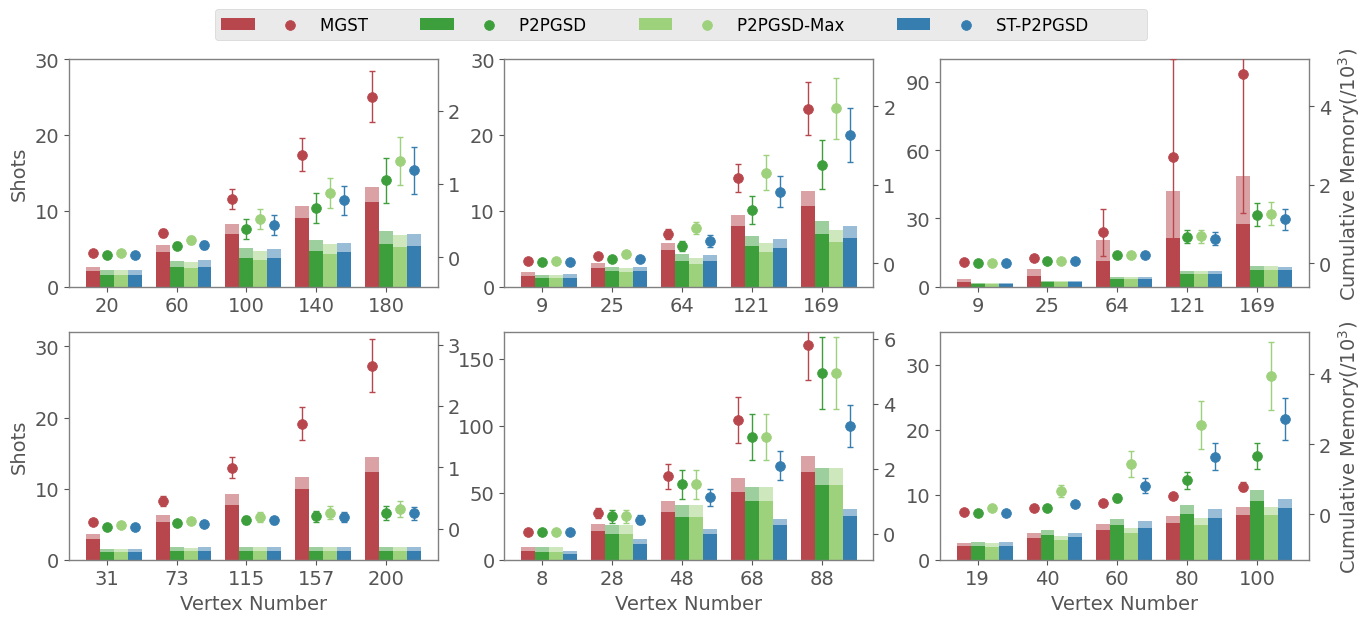

In [9]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16, 6.5),sharey=False)
fig.subplots_adjust(wspace=0.18)
step=2

methodNum=len(mainDataInfo['methods'])
colorList=plt.cm.tab10(np.linspace(0, 1, 2*methodNum))

width=0.2
multiplier=0
cmScaling=1000
markerSize=50

ax1_twinx=ax1.twinx()

colors = {'MGST':'#b8474d','P2PGSD':'#3d9f3c','P2PGSD-Max':'#9ed17b','ST-P2PGSD':'#367db0'}
for method in plotDataInfo1['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData1[method][i]['AvgVertexNum']) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgShots=np.asarray([plotProcessMethodData1[method][i]['AvgShots'] for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData1[method][i]['VarShots']) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgCM=np.asarray([plotProcessMethodData1[method][i]['AvgCumulativeMem'] for i in range(0,plotDataInfo1['groupNum'],step)])/cmScaling
    AvgCMRootVar=np.asarray([np.sqrt(plotProcessMethodData1[method][i]['VarCumulativeMem']) for i in range(0,plotDataInfo1['groupNum'],step)])/cmScaling

    x=np.arange(len(AvgVertexNum))
    offset=width*multiplier
    multiplier+=1
    ax1.bar(x+offset,AvgShots,width,color=color1,label=' ')
    ax1.bar(x+offset,AvgShotsRootVar,width,bottom=AvgShots,color=color1,alpha=0.5)
    ax1_twinx.scatter(x+offset,AvgCM,color=color2,label=method+"          ",marker='o',s=markerSize)
    ax1_twinx.errorbar(x+offset,AvgCM,yerr=AvgCMRootVar,fmt='.',markersize=0,color=color2,elinewidth=1,capsize=2)

ax1.set_xticks(x+width,AvgVertexNum,fontsize=FONT_SIZE)
ax1.set_ylabel('Shots',fontsize=FONT_SIZE)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_twinx.get_legend_handles_labels()
handles = []
labels = []
for i in range(0,4):
    handles.append(handles1[i])
    handles.append(handles2[i])
    labels.append(labels1[i])
    labels.append(labels2[i])
fig.legend(handles=handles, 
           labels=labels, 
           ncol=10,frameon=True,fontsize=FONT_SIZE-2,bbox_to_anchor=(0.304, 0.47, 0.5, 0.5),columnspacing=0)

multiplier=0

ax2_twinx=ax2.twinx()

for method in plotDataInfo2['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData2[method][i]['AvgVertexNum']) for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShots=np.asarray([plotProcessMethodData2[method][i]['AvgShots'] for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData2[method][i]['VarShots']) for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgCM=np.asarray([plotProcessMethodData2[method][i]['AvgCumulativeMem'] for i in range(0,plotDataInfo2['groupNum'],step)])/cmScaling
    AvgCMRootVar=np.asarray([np.sqrt(plotProcessMethodData2[method][i]['VarCumulativeMem']) for i in range(0,plotDataInfo2['groupNum'],step)])/cmScaling

    x=np.arange(len(AvgVertexNum))
    offset=width*multiplier
    multiplier+=1
    ax2.bar(x+offset,AvgShots,width,label=method,color=color1)
    ax2.bar(x+offset,AvgShotsRootVar,width,bottom=AvgShots,color=color1,alpha=0.5)
    ax2_twinx.scatter(x+offset,AvgCM,color=color2,label=method,marker='o',s=markerSize)
    ax2_twinx.errorbar(x+offset,AvgCM,yerr=AvgCMRootVar,fmt='.',markersize=0,color=color2,elinewidth=1,capsize=2)

ax2.set_xticks(x+width,AvgVertexNum)

multiplier=0
ax3_twinx=ax3.twinx()
ax3_twinx.set_ylabel(r'Cumulative Memory$(/10^3)$')
ax3_twinx.grid(False)



for method in plotDataInfo3['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData3[method][i]['AvgVertexNum']) for i in range(0,plotDataInfo3['groupNum'],step)])
    AvgShots=np.asarray([plotProcessMethodData3[method][i]['AvgShots'] for i in range(0,plotDataInfo3['groupNum'],step)])
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData3[method][i]['VarShots']) for i in range(0,plotDataInfo3['groupNum'],step)])
    AvgCM=np.asarray([plotProcessMethodData3[method][i]['AvgCumulativeMem'] for i in range(0,plotDataInfo3['groupNum'],step)])/cmScaling
    AvgCMRootVar=np.asarray([np.sqrt(plotProcessMethodData3[method][i]['VarCumulativeMem']) for i in range(0,plotDataInfo3['groupNum'],step)])/cmScaling

    x=np.arange(len(AvgVertexNum))
    offset=width*multiplier
    multiplier+=1
    ax3.bar(x+offset,AvgShots,width,label=method,color=color1)
    ax3.bar(x+offset,AvgShotsRootVar,width,bottom=AvgShots,color=color1,alpha=0.5)
    ax3_twinx.scatter(x+offset,AvgCM,color=color2,label=method,marker='o',s=markerSize)
    ax3_twinx.errorbar(x+offset,AvgCM,yerr=AvgCMRootVar,fmt='.',markersize=0,color=color2,elinewidth=1,capsize=2)

ax3.set_ylim(0,20)
ax3.set_xticks(x+width,AvgVertexNum)


multiplier=0
ax4_twinx=ax4.twinx()
ax4_twinx.grid(False)
step=2


for method in plotDataInfo4['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData4[method][i]['AvgVertexNum']) for i in range(1,plotDataInfo4['groupNum'],step)])
    AvgShots=np.asarray([plotProcessMethodData4[method][i]['AvgShots'] for i in range(1,plotDataInfo4['groupNum'],step)])
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData4[method][i]['VarShots']) for i in range(1,plotDataInfo4['groupNum'],step)])
    AvgCM=np.asarray([plotProcessMethodData4[method][i]['AvgCumulativeMem'] for i in range(1,plotDataInfo4['groupNum'],step)])/cmScaling
    AvgCMRootVar=np.asarray([np.sqrt(plotProcessMethodData4[method][i]['VarCumulativeMem']) for i in range(1,plotDataInfo4['groupNum'],step)])/cmScaling

    x=np.arange(len(AvgVertexNum))
    offset=width*multiplier
    multiplier+=1
    ax4.bar(x+offset,AvgShots,width,label=method,color=color1)
    ax4.bar(x+offset,AvgShotsRootVar,width,bottom=AvgShots,color=color1,alpha=0.5)
    ax4_twinx.scatter(x+offset,AvgCM,color=color2,label=method,marker='o',s=markerSize)
    ax4_twinx.errorbar(x+offset,AvgCM,yerr=AvgCMRootVar,fmt='.',markersize=0,color=color2,elinewidth=1,capsize=2)

ax4.set_xticks(x+width,AvgVertexNum)
ax4.set_xlabel('Vertex Number')
ax4.set_ylabel('Shots',fontsize=FONT_SIZE)

multiplier=0
ax5_twinx=ax5.twinx()
ax5_twinx.set_ylim(-125/cmScaling,4000/cmScaling)
ax5_twinx.grid(False)
step=2


for method in plotDataInfo5['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData5[method][i]['AvgVertexNum']) for i in range(0,plotDataInfo5['groupNum'],step)])
    AvgShots=np.asarray([plotProcessMethodData5[method][i]['AvgShots'] for i in range(0,plotDataInfo5['groupNum'],step)])
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData5[method][i]['VarShots']) for i in range(0,plotDataInfo5['groupNum'],step)])
    AvgCM=np.asarray([plotProcessMethodData5[method][i]['AvgCumulativeMem'] for i in range(0,plotDataInfo5['groupNum'],step)])/cmScaling
    AvgCMRootVar=np.asarray([np.sqrt(plotProcessMethodData5[method][i]['VarCumulativeMem']) for i in range(0,plotDataInfo5['groupNum'],step)])/cmScaling

    x=np.arange(len(AvgVertexNum))
    offset=width*multiplier
    multiplier+=1
    ax5.bar(x+offset,AvgShots,width,label=method,color=color1)
    ax5.bar(x+offset,AvgShotsRootVar,width,bottom=AvgShots,color=color1,alpha=0.5)
    ax5_twinx.scatter(x+offset,AvgCM,color=color2,label=method,marker='o',s=markerSize)
    ax5_twinx.errorbar(x+offset,AvgCM,yerr=AvgCMRootVar,fmt='.',markersize=0,color=color2,elinewidth=1,capsize=2)

ax5.set_xticks(x+width,AvgVertexNum)
ax5.set_xlabel('Vertex Number')

multiplier=0
ax6_twinx=ax6.twinx()
ax6_twinx.set_ylabel(r'Cumulative Memory$(/10^3)$')
ax6_twinx.set_ylim(-125/cmScaling,4000/cmScaling)
ax6_twinx.grid(False)
step=1


for method in plotDataInfo6['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData6[method][i]['AvgVertexNum']) for i in range(0,plotDataInfo6['groupNum'],step)])
    AvgShots=np.asarray([plotProcessMethodData6[method][i]['AvgShots'] for i in range(0,plotDataInfo6['groupNum'],step)])
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData6[method][i]['VarShots']) for i in range(0,plotDataInfo6['groupNum'],step)])
    AvgCM=np.asarray([plotProcessMethodData6[method][i]['AvgCumulativeMem'] for i in range(0,plotDataInfo6['groupNum'],step)])/cmScaling
    AvgCMRootVar=np.asarray([np.sqrt(plotProcessMethodData6[method][i]['VarCumulativeMem']) for i in range(0,plotDataInfo6['groupNum'],step)])/cmScaling

    x=np.arange(len(AvgVertexNum))
    offset=width*multiplier
    multiplier+=1
    ax6.bar(x+offset,AvgShots,width,label=method,color=color1)
    ax6.bar(x+offset,AvgShotsRootVar,width,bottom=AvgShots,color=color1,alpha=0.5)
    ax6_twinx.scatter(x+offset,AvgCM,color=color2,label=method,marker='o',s=markerSize)
    ax6_twinx.errorbar(x+offset,AvgCM,yerr=AvgCMRootVar,fmt='.',markersize=0,color=color2,elinewidth=1,capsize=2)

ax6.set_xticks(x+width,AvgVertexNum)
ax6.set_xlabel('Vertex Number')

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.grid(False)
    ax.set_facecolor("w")
    ax.spines['bottom'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['top'].set_color('grey')

for ax in [ax1_twinx,ax2_twinx,ax3_twinx,ax4_twinx,ax5_twinx,ax6_twinx]:
    ax.grid(False)
    ax.spines[['bottom','right','top','left']].set_visible(False)

ax1.set_ylim(0,30)
ax1_twinx.set_ylim(-0.4,2.7)
ax2.set_ylim(0,30)
ax2_twinx.set_ylim(-0.3,2.6)
ax3.set_ylim(0,100)
ax3.set_yticks([0,30,60,90])
ax3_twinx.set_ylim(-0.6,5.2)
ax4.set_ylim(0,32)
ax4_twinx.set_ylim(-0.5,3.2)
ax5.set_ylim(0,170)
ax5_twinx.set_ylim(-0.8,6.2)
ax6.set_ylim(0,35)
ax6_twinx.set_ylim(-1.3,5.2)
fig.savefig(os.path.join('Fig','PerformanceEvaluate1_SG.svg'),dpi=600,format='svg',bbox_inches='tight')

## Performance Plot Two

This plot illustrates the performance of algorithms under various average channel probabilities.

Read data

In [10]:
#star graph
plotDataFolder1='FixedTypeGraphWithRandomNetwork_VP_N_E_01'
#grid graph
plotDataFolder2='FixedTypeGraphWithRandomNetwork_VP_N_E_03'

selectedMethod=['MGST','P2PGST','P2PGST-Max','ST-P2PGST-memShot']

plotDataInfo1,plotProcessMethodData1=read_data(plotDataFolder1,selectedMethods=selectedMethod)
plotDataInfo2,plotProcessMethodData2=read_data(plotDataFolder2,selectedMethods=selectedMethod)

mainDataInfo=plotDataInfo1

Plot Data

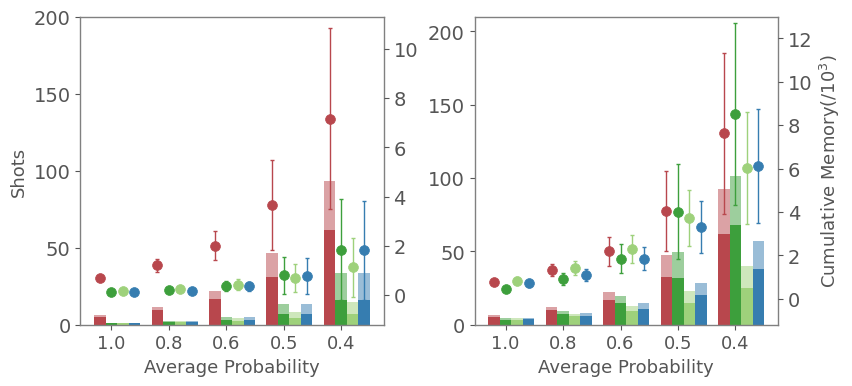

In [11]:
FONT_SIZE=13
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4),sharey=False)
fig.subplots_adjust(wspace=0.3)
step=1

methodNum=len(mainDataInfo['methods'])
colorList=plt.cm.tab10(np.linspace(0, 1, 2*methodNum))

width=0.2
multiplier=0
cmScaling=1000
scatterSize=50

ax1_twinx=ax1.twinx()

ax1_twinx.set_yticks([0,2,4,6,8,10,12])
ax1_twinx.grid(True)

plotLabelsAndHandles={}
for method in plotDataInfo1['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgProb=np.asarray([round(plotProcessMethodData1[method][i]['AvgProb'],1) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgProb=AvgProb
    AvgShots=np.asarray([plotProcessMethodData1[method][i]['AvgShots'] for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgShots=AvgShots
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData1[method][i]['VarShots']) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgShotsRootVar=AvgShotsRootVar
    AvgCM=np.asarray([plotProcessMethodData1[method][i]['AvgCumulativeMem'] for i in range(0,plotDataInfo1['groupNum'],step)])/cmScaling
    AvgCM=AvgCM
    AvgCMRootVar=np.asarray([np.sqrt(plotProcessMethodData1[method][i]['VarCumulativeMem']) for i in range(0,plotDataInfo1['groupNum'],step)])/cmScaling
    AvgCMRootVar=AvgCMRootVar

    x=np.arange(len(AvgProb))
    offset=width*multiplier
    multiplier+=1
    ax1.bar(x+offset,AvgShots,width,color=color1,label=' ')
    ax1.bar(x+offset,AvgShotsRootVar,width,bottom=AvgShots,color=color1,alpha=0.5)
    ax1_twinx.scatter(x+offset,AvgCM,color=color2,label=method,marker='o',s=scatterSize)
    ax1_twinx.errorbar(x+offset,AvgCM,yerr=AvgCMRootVar,fmt='.',markersize=0,color=color2,elinewidth=1,capsize=1.5)

ax1.set_xticks(x+width,AvgProb,fontsize=FONT_SIZE)
ax1.set_ylabel('Shots',fontsize=FONT_SIZE)
ax1.set_xlabel('Average Probability',fontsize=FONT_SIZE)


multiplier=0

ax2_twinx=ax2.twinx()
ax2_twinx.set_ylim(-125/cmScaling,10000/cmScaling)

ax2_twinx.grid(False)

for method in plotDataInfo2['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgProb=np.asarray([round(plotProcessMethodData2[method][i]['AvgProb'],1) for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgProb=AvgProb
    AvgShots=np.asarray([plotProcessMethodData2[method][i]['AvgShots'] for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShots=AvgShots
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData2[method][i]['VarShots']) for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShotsRootVar=AvgShotsRootVar
    AvgCM=np.asarray([plotProcessMethodData2[method][i]['AvgCumulativeMem'] for i in range(0,plotDataInfo2['groupNum'],step)])/cmScaling
    AvgCM=AvgCM
    AvgCMRootVar=np.asarray([np.sqrt(plotProcessMethodData2[method][i]['VarCumulativeMem']) for i in range(0,plotDataInfo2['groupNum'],step)])/cmScaling
    AvgCMRootVar=AvgCMRootVar

    x=np.arange(len(AvgProb))
    offset=width*multiplier
    multiplier+=1
    ax2.bar(x+offset,AvgShots,width,color=color1,label=' ')
    ax2.bar(x+offset,AvgShotsRootVar,width,bottom=AvgShots,color=color1,alpha=0.5)
    ax2_twinx.scatter(x+offset,AvgCM,color=color2,label=method,marker='o',s=scatterSize)
    ax2_twinx.errorbar(x+offset,AvgCM,yerr=AvgCMRootVar,fmt='.',markersize=0,color=color2,elinewidth=1,capsize=1.5)

ax2.set_xticks(x+width,AvgProb,fontsize=FONT_SIZE)
ax2_twinx.set_ylabel(r'Cumulative Memory$(/10^3)$',fontsize=FONT_SIZE)
ax2.set_xlabel('Average Probability',fontsize=FONT_SIZE)
ax2_twinx.set_yticks([0,2,4,6,8,10,12])

multiplier=0

for ax in [ax1,ax2]:
    ax.grid(False)
    ax.set_facecolor("w")
    ax.spines['bottom'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['top'].set_color('grey')

for ax in [ax1_twinx,ax2_twinx]:
    ax.grid(False)
    ax.spines[['bottom','right','top','left']].set_visible(False)

ax1.set_ylim(0,200)
ax1_twinx.set_ylim(-1.2,11.3)
ax2.set_ylim(0,210)
ax2_twinx.set_ylim(-1.2,13)

fig.savefig(os.path.join('Fig','PerformanceEvaluate2_SG.svg'),dpi=600,format='svg',bbox_inches='tight')

## Performance Plot Three

This plot addresses the runtime issue.

Read Data

In [12]:
#varying the number of vertices
plotDataFolder1='FixedTypeGraphWithRandomNetwork_TE_N_E_01'
#varying the number of nodes
plotDataFolder2='FixedTypeGraphWithRandomNetwork_TE_N_E_02'

selectedMethod=['MGST','P2PGST','ST-P2PGST-memShot']

plotDataInfo1,plotProcessMethodData1=read_data(plotDataFolder1,selectedMethods=selectedMethod)
plotDataInfo2,plotProcessMethodData2=read_data(plotDataFolder2,selectedMethods=selectedMethod)
plotDataInfo3,plotProcessMethodData3=read_data(plotDataFolder3,selectedMethods=selectedMethod)

mainDataInfo=plotDataInfo1

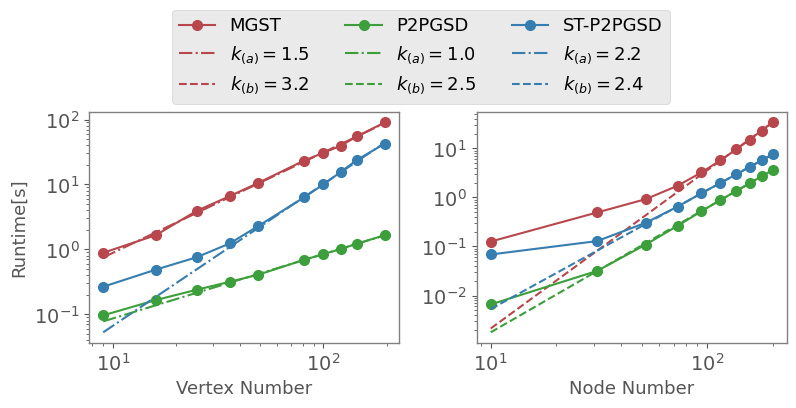

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3),sharey=False)
fig.subplots_adjust(wspace=0.25)
step=1

methodNum=len(mainDataInfo['methods'])
colorList=plt.cm.tab10(np.linspace(0, 1, 2*methodNum))
markerSize=7

for method in plotDataInfo1['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData1[method][i]['AvgVertexNum']) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgTimeConsumed=np.asarray([plotProcessMethodData1[method][i]['AvgTimeConsumed'] for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgTimeConsumedRootVar=np.asarray([np.sqrt(plotProcessMethodData1[method][i]['VarTimeConsumed']) for i in range(0,plotDataInfo1['groupNum'],step)])
    
    #plot the fitting line
    ax1.plot(AvgVertexNum,AvgTimeConsumed,color=color2,label=method,marker='o',markersize=markerSize)
    linearReg=np.polyfit(np.log(AvgVertexNum[5:]),np.log(AvgTimeConsumed[5:]),1)
    p1=np.poly1d(linearReg)
    ax1.plot(AvgVertexNum,np.exp(p1(np.log(AvgVertexNum))),color=color2,linestyle='-.',label=r'$k_{(a)}=$%.1f'%linearReg[0])



ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('Runtime[s]',fontsize=FONT_SIZE)
ax1.set_xlabel('Vertex Number',fontsize=FONT_SIZE)

for method in plotDataInfo2['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgNodeNum=np.asarray([int(plotProcessMethodData2[method][i]['AvgNodeNum']) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgTimeConsumed=np.asarray([plotProcessMethodData2[method][i]['AvgTimeConsumed'] for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgTimeConsumedRootVar=np.asarray([np.sqrt(plotProcessMethodData2[method][i]['VarTimeConsumed']) for i in range(0,plotDataInfo2['groupNum'],step)])
    

    ax2.plot(AvgNodeNum,AvgTimeConsumed,color=color2,marker='o',ms=markerSize)
    linearReg=np.polyfit(np.log(AvgNodeNum[5:]),np.log(AvgTimeConsumed[5:]),1)
    p1=np.poly1d(linearReg)
    ax2.plot(AvgNodeNum,np.exp(p1(np.log(AvgNodeNum))),color=color2,linestyle='--',label=r'$k_{(b)}=$%.1f'%linearReg[0])

#rearrange the legend
handles1,labels1 = ax1.get_legend_handles_labels()
plotLabels=labels1
plotHandles=handles1
handles2,labels2 = ax2.get_legend_handles_labels()
newLabels=[]
newHandles=[]
for i in range(0,len(labels2)):
    newLabels.append(labels1[2*i])
    newLabels.append(labels1[2*i+1])
    newLabels.append(labels2[i])
    newHandles.append(handles1[2*i])
    newHandles.append(handles1[2*i+1])
    newHandles.append(handles2[i])

fig.legend(newHandles,newLabels,ncol=3,frameon=True,fontsize=FONT_SIZE,bbox_to_anchor=(0.28, 0.75, 0.5, 0.5))


ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Node Number',fontsize=FONT_SIZE)

for ax in [ax1,ax2]:
    ax.grid(False)
    ax.set_facecolor("w")
    ax.spines['bottom'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['top'].set_color('grey')


fig.savefig(os.path.join('Fig','PerformanceEvaluate3_SG.svg'),dpi=600,format='svg',bbox_inches='tight')

## Appendix Plot One

This plot addresses the performance of various recovery strategies.

Read Data

In [14]:

mainMethod='P2PGST'

plotDataFolder1='FixedTypeGraphWithRandomNetwork_VP_N_RE_01'

selectedMethods=[]
for recMethod in RECOVERY_METHODS.keys():
    selectedMethods.append(mainMethod+'-'+recMethod)

plotDataInfo1,plotProcessMethodData1=read_data(plotDataFolder1,selectedMethods=selectedMethods,detailSeedFileName='graphSeeds.npy')

mainDataInfo=plotDataInfo1

Plot Data

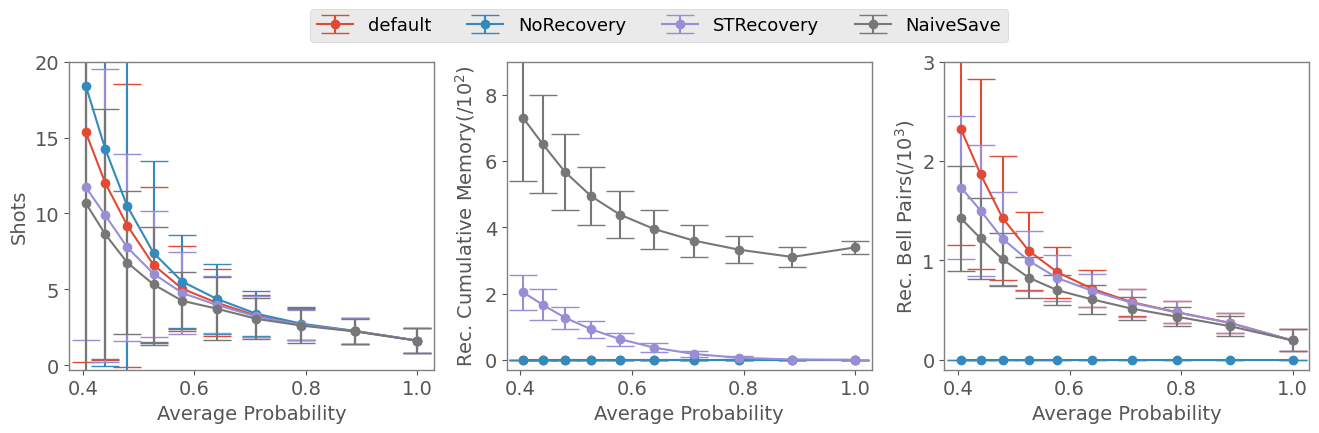

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4),sharey=False)
fig.subplots_adjust(wspace=0.2)

groupNum=plotDataInfo1['groupNum']

BellPairsScale=1000
CMScale=100

for method in plotDataInfo1['methods']:
    AvgProb=[plotProcessMethodData1[method][i]['AvgProb'] for i in range(groupNum)]
    AvgShots=[plotProcessMethodData1[method][i]['AvgShots'] for i in range(groupNum)]
    AvgShotsRootVar=[np.sqrt(plotProcessMethodData1[method][i]['VarShots']) for i in range(groupNum)]

    AvgCM=[plotProcessMethodData1[method][i]['AvgRecMemUsed'] for i in range(groupNum)]
    AvgCMRootVar=[np.sqrt(plotProcessMethodData1[method][i]['VarRecMemUsed']) for i in range(groupNum)]

    AvgBP=[plotProcessMethodData1[method][i]['AvgRecBellUsed'] for i in range(groupNum)]
    AvgBPRootVar=[np.sqrt(plotProcessMethodData1[method][i]['VarRecBellUsed']) for i in range(groupNum)]
    
    ax1.errorbar(AvgProb, AvgShots, yerr=AvgShotsRootVar, label=method, marker='o', capsize=10)
    ax2.errorbar(AvgProb, np.asarray(AvgCM)/CMScale, yerr=np.asarray(AvgCMRootVar)/CMScale, label=method, marker='o', capsize=10)    
    ax3.errorbar(AvgProb, np.asarray(AvgBP)/BellPairsScale, yerr=np.asarray(AvgBPRootVar)/BellPairsScale, label=method, marker='o', capsize=10)


for ax in [ax1,ax2,ax3]:
    ax.grid(False)
    ax.set_facecolor("w")
    ax.spines['bottom'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['top'].set_color('grey')

ax1.set_xlabel('Average Probability')
ax1.set_ylabel('Shots')
ax1.set_ylim(-0.3,20)
ax2.set_xlabel('Average Probability')
ax2.set_ylabel(r'Rec. Cumulative Memory$(/10^2)$')
ax2.set_ylim(-0.3,9)
ax3.set_xlabel('Average Probability')
ax3.set_ylabel(r'Rec. Bell Pairs$(/10^3)$')
ax3.set_ylim(-0.1,3)
ax3.set_yticks([0,1,2,3])
plt.legend(ncol=4,frameon=True,fontsize=FONT_SIZE,bbox_to_anchor=(-0.3, 0.7, 0.5, 0.5))

fig.savefig(os.path.join('Fig','Appendix1_SG.svg'),dpi=600,format='svg',bbox_inches='tight')

## Appendix Plot Two

This plot addresses the performance of the minCost version of MGST.

Read Data

In [16]:
plotDataFolder1='FixedTypeGraphWithRandomNetwork_ND_N_E_03'
plotDataFolder2='FixedTypeGraphWithRandomNetwork_VP_N_E_03'
plotDataFolder4='FixedTypeGraphWithRandomNetwork_TE_N_E_01'

selectedMethod=['MGST','MGST-minCost-memShot','P2PGST','P2PGST-Max','ST-P2PGST-memShot']

plotDataInfo1,plotProcessMethodData1=read_data(plotDataFolder1,selectedMethods=selectedMethod)
plotDataInfo2,plotProcessMethodData2=read_data(plotDataFolder2,selectedMethods=selectedMethod)
plotDataInfo4,plotProcessMethodData4=read_data(plotDataFolder4,selectedMethods=selectedMethod)

mainDataInfo=plotDataInfo1

No data for P2PGSD-Max


In [17]:
plotDataFolder3='FixedTypeGraphWithRandomNetwork_VP_N_RE_01'

selectedMethods3_1=['MGST-default','MGST-NoRecovery']
selectedMethods3_2=['MGST-minCost-memShot-default','MGST-minCost-memShot-NoRecovery']

plotDataInfo3_1,plotProcessMethodData3_1=read_data(plotDataFolder3,selectedMethods=selectedMethods3_1,detailSeedFileName='graphSeeds.npy')
plotDataInfo3_2,plotProcessMethodData3_2=read_data(plotDataFolder3,selectedMethods=selectedMethods3_2,detailSeedFileName='graphSeeds.npy')

Plot Data

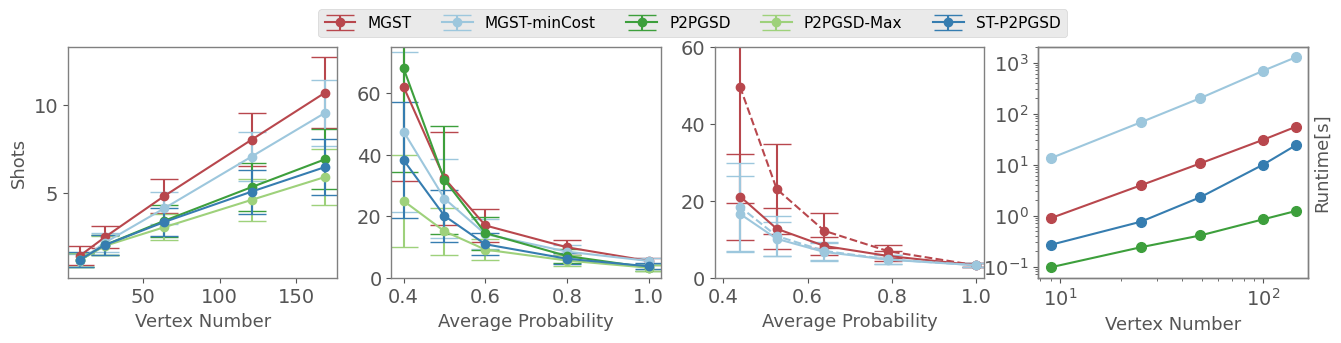

In [18]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 3),sharey=False)
step=2

methodNum=len(mainDataInfo['methods'])

colors = {'MGST':'#b8474d','P2PGSD':'#3d9f3c','P2PGSD-Max':'#9ed17b','ST-P2PGSD':'#367db0','MGST-minCost':'#9dc7dd'}
for method in plotDataInfo1['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData1[method][i]['AvgVertexNum']) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgShots=np.asarray([plotProcessMethodData1[method][i]['AvgShots'] for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData1[method][i]['VarShots']) for i in range(0,plotDataInfo1['groupNum'],step)])

    ax1.errorbar(AvgVertexNum, AvgShots, yerr=AvgShotsRootVar, label=method, marker='o', capsize=10, color=color1)


handles1, labels1 = ax1.get_legend_handles_labels()
handles = []
labels = []
for i in range(0,5):
    handles.append(handles1[i])
    labels.append(labels1[i])
fig.legend(handles=handles, 
           labels=labels, 
           ncol=10,frameon=True,fontsize=FONT_SIZE-2,bbox_to_anchor=(0.254, 0.53,0.5, 0.5))

step=1
for method in plotDataInfo2['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgProb=np.asarray([round(plotProcessMethodData2[method][i]['AvgProb'],1) for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShots=np.asarray([plotProcessMethodData2[method][i]['AvgShots'] for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData2[method][i]['VarShots']) for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShotsRootVar=AvgShotsRootVar

    ax2.errorbar(AvgProb, AvgShots, yerr=AvgShotsRootVar, label=method, marker='o', capsize=10, color=color1)

step=2
AvgProb=[plotProcessMethodData3_1['default'][i]['AvgProb'] for i in range(0,plotDataInfo3_1['groupNum'],step)]
AvgShots_default=[plotProcessMethodData3_1['default'][i]['AvgShots'] for i in range(0,plotDataInfo3_1['groupNum'],step)]
AvgShotsRootVar_default=[np.sqrt(plotProcessMethodData3_1['default'][i]['VarShots']) for i in range(0,plotDataInfo3_1['groupNum'],step)]
AvgShots_noRecovery=[plotProcessMethodData3_1['NoRecovery'][i]['AvgShots'] for i in range(0,plotDataInfo3_1['groupNum'],step)]
AvgShotsRootVar_noRecovery=[np.sqrt(plotProcessMethodData3_1['NoRecovery'][i]['VarShots']) for i in range(0,plotDataInfo3_1['groupNum'],step)]
ax3.errorbar(AvgProb,AvgShots_noRecovery, yerr=AvgShotsRootVar_noRecovery, linestyle='--', marker='o', capsize=10, color=colors['MGST'])
ax3.errorbar(AvgProb, AvgShots_default, yerr=AvgShotsRootVar_default, linestyle='-', marker='o', capsize=10, color=colors['MGST'])
AvgShots_default=[plotProcessMethodData3_2['default'][i]['AvgShots'] for i in range(0,plotDataInfo3_2['groupNum'],step)]
AvgShotsRootVar_default=[np.sqrt(plotProcessMethodData3_2['default'][i]['VarShots']) for i in range(0,plotDataInfo3_2['groupNum'],step)]
AvgShots_noRecovery=[plotProcessMethodData3_2['NoRecovery'][i]['AvgShots'] for i in range(0,plotDataInfo3_2['groupNum'],step)]
AvgShotsRootVar_noRecovery=[np.sqrt(plotProcessMethodData3_2['NoRecovery'][i]['VarShots']) for i in range(0,plotDataInfo3_2['groupNum'],step)]
ax3.errorbar(AvgProb,AvgShots_noRecovery, yerr=AvgShotsRootVar_noRecovery, linestyle='--', marker='o', capsize=10, color=colors['MGST-minCost'])
ax3.errorbar(AvgProb, AvgShots_default, yerr=AvgShotsRootVar_default, linestyle='-', marker='o', capsize=10, color=colors['MGST-minCost'])

for method in plotDataInfo4['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgVertexNum=np.asarray([int(plotProcessMethodData4[method][i]['AvgVertexNum']) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgTimeConsumed=np.asarray([plotProcessMethodData4[method][i]['AvgTimeConsumed'] for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgTimeConsumedRootVar=np.asarray([np.sqrt(plotProcessMethodData4[method][i]['VarTimeConsumed']) for i in range(0,plotDataInfo1['groupNum'],step)])
    
    ax4.plot(AvgVertexNum,AvgTimeConsumed,color=color2,label=method,marker='o',markersize=markerSize)
ax4_twinx=ax4.twinx()
ax4_twinx.set_yticks([])
ax4.set_xscale('log')
ax4.set_yscale('log')


for ax in [ax1,ax2,ax3,ax4]:
    ax.grid(False)
    ax.set_facecolor("w")
    ax.spines['bottom'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['top'].set_color('grey')

ax4_twinx.spines['right'].set_color('grey')
ax4_twinx.spines['left'].set_color('grey')
ax4_twinx.spines['top'].set_color('grey')
ax4_twinx.spines['bottom'].set_color('grey')

ax1.set_ylabel('Shots',fontsize=FONT_SIZE)
ax1.set_xlabel('Vertex Number',fontsize=FONT_SIZE)
ax2.set_ylim(0,75)
ax2.set_xlabel('Average Probability',fontsize=FONT_SIZE)
ax3.set_ylim(0,60)
ax3.set_xlim(0.38,1.02)
ax3.set_xlabel('Average Probability',fontsize=FONT_SIZE)
ax4.set_xlabel('Vertex Number',fontsize=FONT_SIZE)

ax4_twinx.set_ylabel('Runtime[s]',fontsize=FONT_SIZE)
fig.savefig(os.path.join('Fig','Appendix2_SG.svg'),dpi=600,format='svg',bbox_inches='tight')

## Appendix Plot Three

This plot addresses the performance of the algorithms under network of different connectivity levels.

In [19]:
plotDataFolder1='FixedTypeGraphWithRandomNetwork_VD_N_E_03'
plotDataFolder2='FixedTypeGraphWithRandomNetwork_VW_N_E_03'

selectedMethod=['MGST','P2PGST','P2PGST-Max','ST-P2PGST-memShot']

plotDataInfo1,plotProcessMethodData1=read_data(plotDataFolder1,selectedMethods=selectedMethod)
plotDataInfo2,plotProcessMethodData2=read_data(plotDataFolder2,selectedMethods=selectedMethod)

mainDataInfo=plotDataInfo1

Plot Data

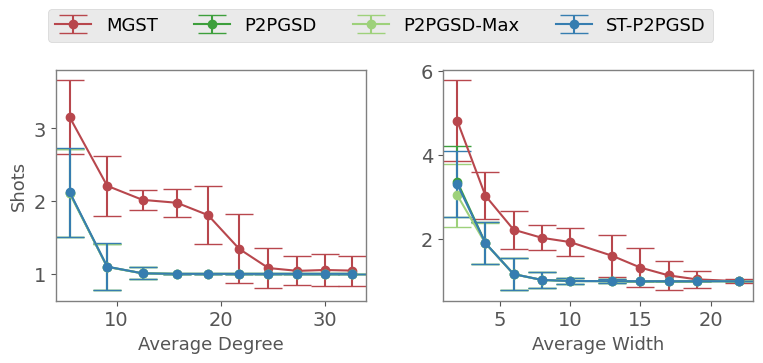

In [20]:
FONT_SIZE=13
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3),sharey=False)
fig.subplots_adjust(wspace=0.25)
step=1

methodNum=len(mainDataInfo['methods'])
colorList=plt.cm.tab10(np.linspace(0, 1, 2*methodNum))

width=0.2
multiplier=0
cmScaling=1000
scatterSize=50


plotLabelsAndHandles={}
for method in plotDataInfo1['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgDegree=np.asarray([round(plotProcessMethodData1[method][i]['AvgDegree'],1) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgDegree=AvgDegree
    AvgShots=np.asarray([plotProcessMethodData1[method][i]['AvgShots'] for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgShots=AvgShots
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData1[method][i]['VarShots']) for i in range(0,plotDataInfo1['groupNum'],step)])
    AvgShotsRootVar=AvgShotsRootVar

    ax1.errorbar(AvgDegree, AvgShots, yerr=AvgShotsRootVar, label=method, marker='o', capsize=10, color=color1)

ax1.set_ylabel('Shots',fontsize=FONT_SIZE)
ax1.set_xlabel('Average Degree',fontsize=FONT_SIZE)


for method in plotDataInfo2['methods']:
    color1=colors[method]
    color2=colors[method]

    AvgWidth=np.asarray([round(plotProcessMethodData2[method][i]['AvgWidth'],1) for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgWidth=AvgWidth
    AvgShots=np.asarray([plotProcessMethodData2[method][i]['AvgShots'] for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShots=AvgShots
    AvgShotsRootVar=np.asarray([np.sqrt(plotProcessMethodData2[method][i]['VarShots']) for i in range(0,plotDataInfo2['groupNum'],step)])
    AvgShotsRootVar=AvgShotsRootVar

    ax2.errorbar(AvgWidth, AvgShots, yerr=AvgShotsRootVar, label=method, marker='o', capsize=10, color=color1)


ax2.set_xlabel('Average Width',fontsize=FONT_SIZE)


for ax in [ax1,ax2]:
    ax.grid(False)
    ax.set_facecolor("w")
    ax.spines['bottom'].set_color('grey')
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.spines['top'].set_color('grey')

plt.legend(ncol=4,frameon=True,fontsize=FONT_SIZE,bbox_to_anchor=(0.4, 0.8, 0.5, 0.5))

fig.savefig(os.path.join('Fig','Appendix3_SG.svg'),dpi=600,format='svg',bbox_inches='tight')